# 02 Community detection

In [1]:
# import requirements
import csv
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# path to datasets
filepath_contacts = 'shortlist.csv'
filepath_calls = 'calls.csv'

In [3]:
# load CSV files
df_contacts = pd.read_csv(filepath_contacts, dtype=int)
df = pd.read_csv(filepath_calls, dtype=int)

In [4]:
df.shape

(15537, 2)

### Prepare data

In [5]:
# get the nodes
phone_numbers = df_contacts['numbers'].to_list()

In [6]:
# keep only relevant calls
df_clean = df[(df['to'].isin(phone_numbers))]

In [7]:
df_clean.shape

(123, 2)

In [8]:
# create tuples to represent calls
records = df_clean.to_records(index=False)
phone_calls = list(records)

In [9]:
print(len(phone_calls))

123


### Vizualisation

In [10]:
# create an empty graph object
G = nx.Graph()

In [11]:
# add nodes from list of numbers
G.add_nodes_from(phone_numbers)

In [12]:
# add edges from calls (an edge is made of two nodes)
G.add_edges_from(phone_calls)

In [13]:
G.number_of_nodes()

105

In [14]:
G.number_of_edges()

123

In [15]:
# set node positions
pos = nx.spring_layout(G)

In [16]:
# set colors
color_map = ["red" if node in phone_numbers else "#424242" for node in G]

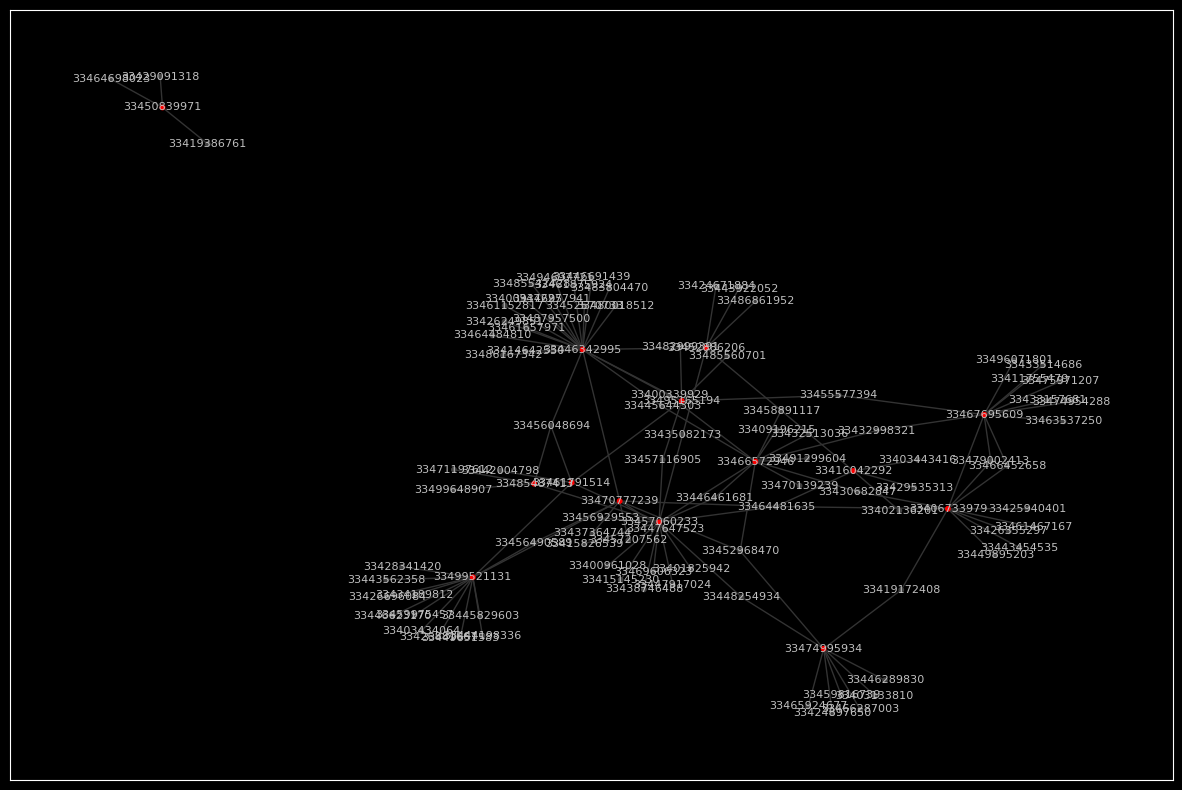

In [17]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

nx.draw_networkx(G, pos,
                 node_color=color_map, node_size=10,
                 font_size=8, font_color="silver",
                 edge_color="#333333")

plt.show()

Isolated person is: 33450839971